<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Vectorization/VECTOR_TRUMP_NEWSBOMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

In [ ]:
 !python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 71.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trump_articles_df = pd.read_csv("/content/drive/MyDrive/Εργασία Python/Articles/trump_df_2025.csv")
trump_articles_df.head(200) # This is a syntax error - head() takes an int argument not slice

,title,article_url,date,time,section,excerpt
0,Πρόεδρος FED για δασμούς Τραμπ: «Πιθανώς θα αυ...,/kosmos/story/1639695/proedros-fed-gia-dasmoys...,04.04.2025,18:39,ΚΟΣΜΟΣ,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...
1,Ο Ντόναλντ Τραμπ κάλεσε τον πρόεδρο της Ομοσπο...,/kosmos/story/1639686/o-donalnt-tramp-kalese-t...,04.04.2025,18:14,ΚΟΣΜΟΣ,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα..."
2,«Σεισμός» στα διεθνή χρηματιστήρια μετά την δι...,/kosmos/story/1639685/seismos-sta-diethni-xrim...,04.04.2025,18:07,ΚΟΣΜΟΣ,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...
3,Ο Τραμπ παίζει γκολφ καθώς οι αμερικανικές μετ...,/kosmos/story/1639670/o-tramp-paizei-golf-kath...,04.04.2025,17:30,ΚΟΣΜΟΣ,"Στη Φλόριντα, ο Ντόναλντ Τραμπ απολαμβάνει ένα..."
4,"«Κάρφωσε» την Κίνα ο Τραμπ: «Πανικοβλήθηκε, το...",/kosmos/story/1639656/karfose-tin-kina-o-tramp...,04.04.2025,16:46,ΚΟΣΜΟΣ,Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθ...
...,...,...,...,...,...,...
195,Ολοκληρώθηκαν οι συνομιλίες Ντόναλντ Τραμπ - Β...,/kosmos/story/1635372/oloklirothikan-oi-synomi...,18.03.2025,18:26,ΚΟΣΜΟΣ,Η κλήση διήρκεσε περίπου μιάμιση ώρα - Ο κόσμο...
196,Σε εξέλιξη δύο ώρες η συνομιλία Τραμπ - Πούτιν...,/kosmos/story/1635341/ksekinise-i-synomilia-tr...,18.03.2025,17:01,ΚΟΣΜΟΣ,Ο Λευκός Οίκος λέει ότι η κλήση βρίσκεται σε ε...
197,Πούτιν: Μας εχουν επιβάλλει περισσότερες κυρώσ...,/kosmos/story/1635340/poytin-mas-exoun-epivall...,18.03.2025,17:01,ΚΟΣΜΟΣ,Τι είπε ο Πρόεδρος της Ρωσίας Βλάντιμιρ Πούτιν...
198,Κρίσιμη συνομιλία Τραμπ - Πούτιν - Τι θα τεθεί...,/kosmos/story/1635327/krisimi-synomilia-tramp-...,18.03.2025,16:09,ΚΟΣΜΟΣ,Στην τηλεφωνική επικοινωνία του Τραμπ με τον Π...


In [ ]:
trump_articles_df.head(115)

,title,article_url,date,time,section,excerpt
0,Πρόεδρος FED για δασμούς Τραμπ: «Πιθανώς θα αυ...,/kosmos/story/1639695/proedros-fed-gia-dasmoys...,04.04.2025,18:39,ΚΟΣΜΟΣ,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...
1,Ο Ντόναλντ Τραμπ κάλεσε τον πρόεδρο της Ομοσπο...,/kosmos/story/1639686/o-donalnt-tramp-kalese-t...,04.04.2025,18:14,ΚΟΣΜΟΣ,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα..."
2,«Σεισμός» στα διεθνή χρηματιστήρια μετά την δι...,/kosmos/story/1639685/seismos-sta-diethni-xrim...,04.04.2025,18:07,ΚΟΣΜΟΣ,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...
3,Ο Τραμπ παίζει γκολφ καθώς οι αμερικανικές μετ...,/kosmos/story/1639670/o-tramp-paizei-golf-kath...,04.04.2025,17:30,ΚΟΣΜΟΣ,"Στη Φλόριντα, ο Ντόναλντ Τραμπ απολαμβάνει ένα..."
4,"«Κάρφωσε» την Κίνα ο Τραμπ: «Πανικοβλήθηκε, το...",/kosmos/story/1639656/karfose-tin-kina-o-tramp...,04.04.2025,16:46,ΚΟΣΜΟΣ,Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθ...
...,...,...,...,...,...,...
110,ΗΠΑ: Ομοσπονδιακό δικαστήριο μπλοκάρει τη διάλ...,/kosmos/story/1638010/ipa-omospondiako-dikasti...,29.03.2025,03:45,ΚΟΣΜΟΣ,Η δικαστής Έιμι Μπέρμαν Τζάκσον των ΗΠΑ έκανε ...
111,ΗΠΑ: Δικαστικά εμπόδια στην προσπάθεια Τραμπ ν...,/kosmos/story/1638007/ipa-dikastika-empodia-st...,29.03.2025,02:13,ΚΟΣΜΟΣ,Η διαταγή απαγορεύει επίσης στον Οργανισμό για...
112,"Greeks for Trump, ο Χρήστος Μαραφάτσος και ελλ...",/kosmos/story/1637861/greeks-for-trump-o-xrist...,28.03.2025,13:37,ΚΟΣΜΟΣ,Στον Λευκό Οίκο η αντιπροσωπεία «Greeks for Tr...
113,Ο Ντόναλντ Τραμπ «σκίζει» σε νέες δημοσκοπήσει...,/kosmos/story/1637859/o-donalnt-tramp-skizei-s...,28.03.2025,13:28,ΚΟΣΜΟΣ,"Αυξάνεται η δημοτικότητα του Ντόναλντ Τραμπ, σ..."


In [ ]:
trump_articles_df['date'] = pd.to_datetime(trump_articles_df['date'], format='mixed', dayfirst=True, errors='coerce')

In [ ]:
trump_articles_df.dtypes

,0
title,object
article_url,object
date,datetime64[ns]
time,object
section,object
excerpt,object


In [ ]:
short_trump_df = trump_articles_df[['date','excerpt']]
short_trump_df = short_trump_df.reset_index(drop=True)
# Now that short_biden_df is defined, we can localize the timezone
short_trump_df['date'] = short_trump_df['date'].dt.tz_localize(None)
short_trump_df.head(1)

,date,excerpt
0,2025-04-04,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...


In [ ]:
short_trump_df['date'] = short_trump_df['date'].dt.tz_localize(None)

In [ ]:
short_trump_df = trump_articles_df[['date','excerpt']]
short_trump_df = short_trump_df.reset_index(drop=True)
short_trump_df.head(1)

,date,excerpt
0,2025-04-04,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...


In [ ]:
short_trump_df['year'] = pd.DatetimeIndex(short_trump_df['date']).year
short_trump_df['month'] = pd.DatetimeIndex(short_trump_df['date']).month
short_trump_df['day'] = pd.DatetimeIndex(short_trump_df['date']).day
short_trump_df['hour'] = pd.DatetimeIndex(short_trump_df['date']).hour

In [ ]:
short_trump_df.head()

,date,excerpt,year,month,day,hour
0,2025-04-04,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...,2025,4,4,0
1,2025-04-04,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα...",2025,4,4,0
2,2025-04-04,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...,2025,4,4,0
3,2025-04-04,"Στη Φλόριντα, ο Ντόναλντ Τραμπ απολαμβάνει ένα...",2025,4,4,0
4,2025-04-04,Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθ...,2025,4,4,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer() #πάντα αυτό

In [ ]:
short_trump_df.head(5)

,date,excerpt,year,month,day,hour
0,2025-04-04,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...,2025,4,4,0
1,2025-04-04,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα...",2025,4,4,0
2,2025-04-04,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...,2025,4,4,0
3,2025-04-04,"Στη Φλόριντα, ο Ντόναλντ Τραμπ απολαμβάνει ένα...",2025,4,4,0
4,2025-04-04,Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθ...,2025,4,4,0


In [ ]:
short_trump_df.shape

(1431, 6)

In [ ]:
short_trump_df['excerpt'] = short_trump_df['excerpt'].fillna('')

In [ ]:
count_vector = cv.fit_transform(short_trump_df['excerpt']) #παίρνουμε τα κείμενα

In [ ]:
count_vector #μοναδικές λέξεις 11520 + 120

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 22428 stored elements and shape (1431, 5586)>

In [ ]:
count_vector.shape

(1431, 5586)

In [ ]:
BoW = cv.get_feature_names_out()
list(BoW)[1400:1410]

['γκίνης',
 'γκαζάκια',
 'γκαλοπατζήδων',
 'γκας',
 'γκεμπρεγέσους',
 'γκιλφόιλ',
 'γκιλφόϊλ',
 'γκολφ',
 'γκουαντάναμο',
 'γκουρού']

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,01,02,03,04,06,092,10,100,11,...,όφειλε,όχημα,όχι,ύλης,ύπατος,ύστερα,ύψους,ώρα,ώρες,ώστε
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [ ]:
count_vector = cv.fit_transform(short_trump_df['excerpt'])

Ο νέος μας πίνακας έχει περίπου 400 στήλες λιγότερες (εφόσον δεν μπήκαν στο BoW τα stopwords)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,01,02,03,04,06,092,10,100,11,...,όρος,όρους,όρων,όφειλε,όχημα,ύλης,ύπατος,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), max_df=0.95, min_df=0.01) #πάρε ο,τι είναι πάνω του 95% των κειμένων

In [ ]:
count_vector = cv.fit_transform(short_trump_df['excerpt'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,25,street,wall,έλον,αμερικής,αμερικανικές,αμερικανική,αμερικανικής,αμερικανού,...,συνομιλίες,σχέσεις,σύμφωνα,τζο,τραμπ,τόνισε,υπουργός,υόρκης,φορά,χρηματιστήριο
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,έλον,δασμούς,είπε,ζελένσκι,ηπα,λευκό,μασκ,μπάιντεν,νέα,νίκη,ντόναλντ,οίκο,ουκρανία,πούτιν,προέδρου,πρόεδρο,πρόεδρος,σήμερα,συνάντηση,τραμπ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Vectorizer με stop words, max features και token pattern**

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,έλον,δασμούς,είπε,ζελένσκι,ηπα,λευκό,μασκ,μπάιντεν,νέα,νίκη,ντόναλντ,οίκο,ουκρανία,πούτιν,προέδρου,πρόεδρο,πρόεδρος,σήμερα,συνάντηση,τραμπ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,wall street,έλον μασκ,αμερικανός πρόεδρος,βλαντιμίρ πούτιν,βολοντίμιρ ζελένσκι,εκλεγμένος πρόεδρος,ηνωμένες πολιτείες,ηνωμένων πολιτειών,ηπα ντόναλντ,λευκό οίκο,μελάνια τραμπ,νέας υόρκης,ντόναλντ τραμπ,προεδρικές εκλογές,πρόεδρο ηπα,πρόεδρος ηπα,πρόεδρος ντόναλντ,τζο μπάιντεν,υόρκης wall,χρηματιστήριο νέας
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False) #Προσθήκη axis στο συνολο των αποτελσμάτων . Στα rows. Μελετάει τις εμφανίσεις αυτού τοτ term.

,0
ντόναλντ τραμπ,463
πρόεδρος ηπα,60
λευκό οίκο,52
ηπα ντόναλντ,46
έλον μασκ,36
αμερικανός πρόεδρος,29
πρόεδρος ντόναλντ,25
βλαντιμίρ πούτιν,23
ηνωμένων πολιτειών,21
βολοντίμιρ ζελένσκι,20


In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

,0
ντόναλντ τραμπ,463
πρόεδρος ηπα,60
λευκό οίκο,52
ηπα ντόναλντ,46
έλον μασκ,36


**Vectorizer με χρήση λεξικού**

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,  #Με αυτό το τρόπο φτιάχνουμε ένα λεξικό παίρνωντας τις λέξεις
                     vocabulary = ['εκλογές', 'πρόεδρος', 'ορκομωσία'])
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,εκλογές,πρόεδρος,ορκομωσία
0,0,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
results.sort_values(by=['εκλογές'], ascending=False).head()

,εκλογές,πρόεδρος,ορκομωσία
1325,2,0,0
1341,1,0,0
983,1,0,0
1306,1,0,0
1351,1,0,0


In [ ]:
short_trump_df['excerpt'].loc[10]

'Το Πεκίνο λέει ότι οι αμερικανικοί δασμοί στα κινεζικά προϊόντα «δεν συνάδουν με τους διεθνείς εμπορικούς κανόνες»'

Τώρα αν θέλω μπορώ να κοιτάξω τι διγράμματα υπάρχουν σ' συτό άρθρο

In [ ]:
# Add 'title' to the list of columns to select
short_trump_df = trump_articles_df[['date','excerpt', 'title']]
short_trump_df = short_trump_df.reset_index(drop=True)
# Ensure there are no NaN values in the 'excerpt' column before vectorization
short_trump_df['excerpt'] = short_trump_df['excerpt'].fillna('')
short_trump_df.head(1)

,date,excerpt,title
0,2025-04-04,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...,Πρόεδρος FED για δασμούς Τραμπ: «Πιθανώς θα αυ...


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=10, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_trump_df.iloc[[10]]['excerpt'])
results114 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
sum_words114 =  results114.sum(axis =0)
sum_words114.sort_values(ascending = False).head()

,0
αμερικανικοί δασμοί,1
δασμοί κινεζικά,1
διεθνείς εμπορικούς,1
εμπορικούς κανόνες,1
κινεζικά προϊόντα,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_trump_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,000,100,18,20,2020,2024,2025,23,25,25ης,...,χούθι,χρηματιστήριο,χρηματοδότηση,χρυσή,χρόνια,χώρα,χώρας,χώρες,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Cosine similarity (ομοιότητα κειμένων)**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity #ΚΑΤΑ ΠΟΣΟ ΤΑ ΑΡΘΡΑ ΜΟΥ ΔΙΑΦΕΡΟΥΝ ΑΠΟ ΤΟΥΣ ΥΠΟΛΟΙΠΟΥΣ. ΠΟΣΟ ΟΙ ΑΛΛΟΙ ΕΧΟΥΝ ΕΠΗΡΕΑΣΤΕΙ ΑΠΟ ΜΕΝΑ

print("cosine scores ==> ")
print(cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with all elements (including itself)

cosine scores ==> 
[[1.         0.         0.02214213 ... 0.         0.02013948 0.30684394]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

In [ ]:
len(arr)

1431

<Axes: >

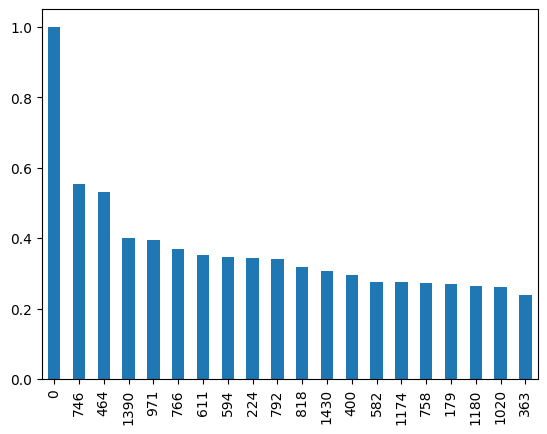

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

Βλέπουμε ότι με το 1ο άρθρο μοιάζει περισσότερο το 4ο

In [ ]:
short_trump_df['excerpt'].loc[0]

'Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρος της Ομοσπονδιακής Τράπεζας'

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_trump_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
short_trump_df['excerpt'].loc[4]

'Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθεί στους τελωνειακούς δασμούς 34% των ΗΠΑ επιβάλλοντας ένα αμοιβαίο μέτρο'

<Axes: >

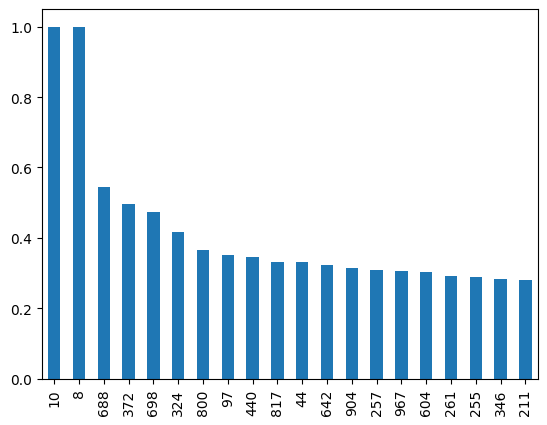

In [ ]:
pd.DataFrame(arr).loc[10].sort_values(ascending = False).head(20).plot(kind = 'bar')

Ας δούμε και με ποιο διαφέρει περισσότερο

<Axes: >

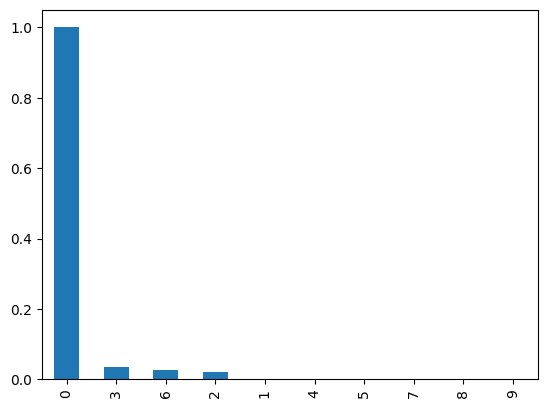

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).tail(10).plot(kind = 'bar')

In [ ]:
short_trump_df['excerpt'].loc[10]

'Το Πεκίνο λέει ότι οι αμερικανικοί δασμοί στα κινεζικά προϊόντα «δεν συνάδουν με τους διεθνείς εμπορικούς κανόνες»'

In [ ]:
short_trump_df['excerpt'].loc[15]

'Τραμπ και Βανς έσπευσαν να υποστηρίξουν τη Μαρίν Λε Πεν μετά την καταδίκη της. Ο πρόεδρος των ΗΠΑ κάνει λόγο…'

In [ ]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων (Τράμπ: Newsbomb)'}>

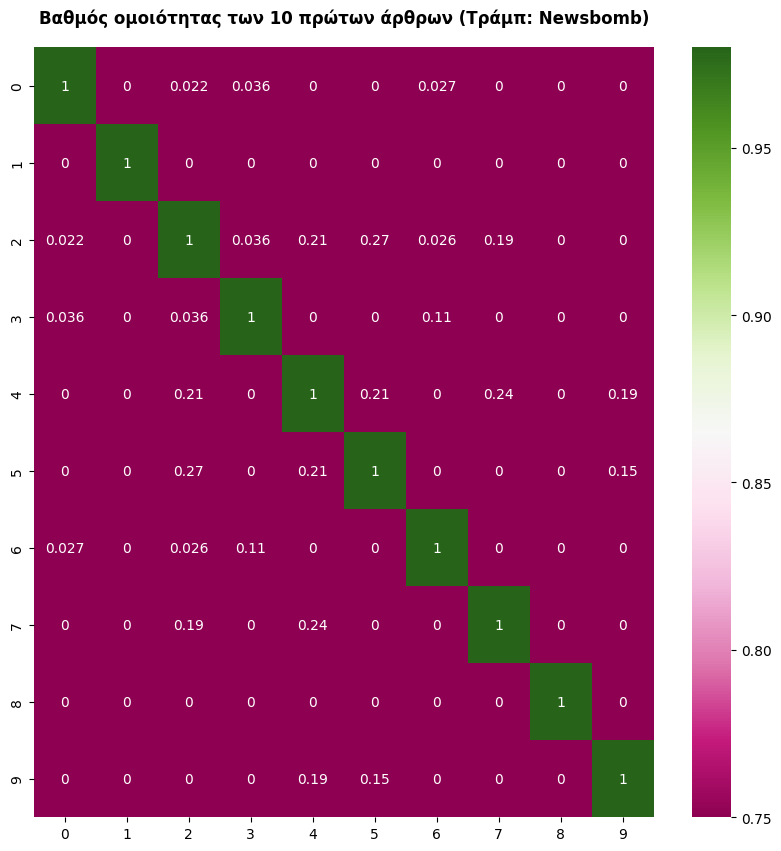

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων (Τράμπ: Newsbomb)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

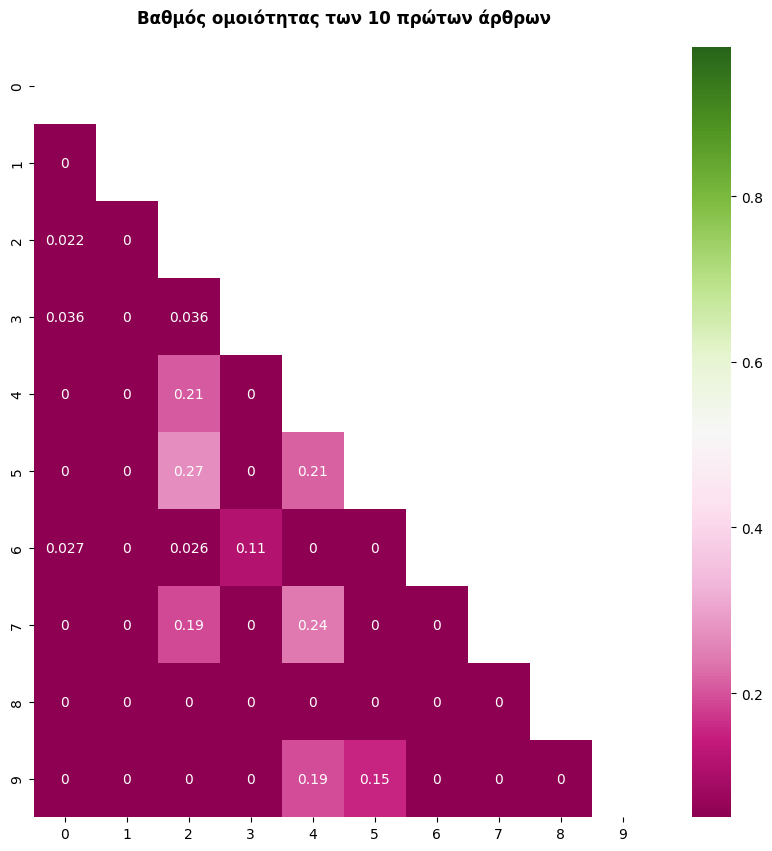

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

# mask
mask = np.triu(np.ones_like(arr, dtype=bool))
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG", mask=mask)

#plt.savefig('<το path και το όνομα του αρχείου>.png')